# <font color= blue> UCSanDiegoX-s-Data-Science-MicroMasters </font> #
## Week-7 of Course 1-Python For Data Science ##
### MACHINE LEARNING -CLUSTERING ###
In cluster analysis, the goal is to organize similar items in your data set into groups, or clusters. Cluster analysis requires some sort of metric
to measure similarity between two samples.Some common similarity measures are: Euclidean distance, which is the distance along a straight line between two points, A and B. Manhattan distance, which is calculated on a strictly horizontal and vertical path as shown in the right plot, to go from point A to point B, you can only step along either the X axis or the Y axis in the two-dimensional case. Cosine similarity measures the Cosine of the angle between points A and B as shown in the bottom plot.
Scaling with input variables puts the variables on the same scale so that all variables have equal weighting in the calculation to determine similarity between samples. Scaling is necessary when you have variables that have very different scales, such as weight and height. cluster analysis is an unsupervised task. This means that there is no target label for any sample
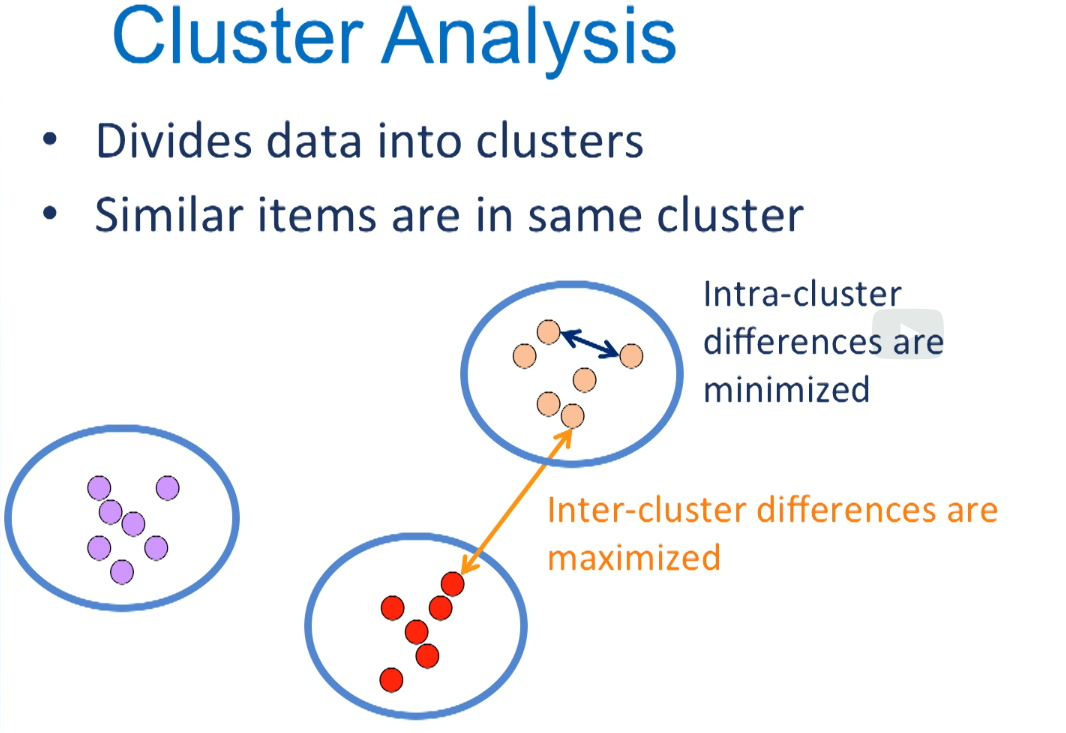

CLUSTERING ALGORITHM: K-means is a classic algorithm used for cluster analysis.
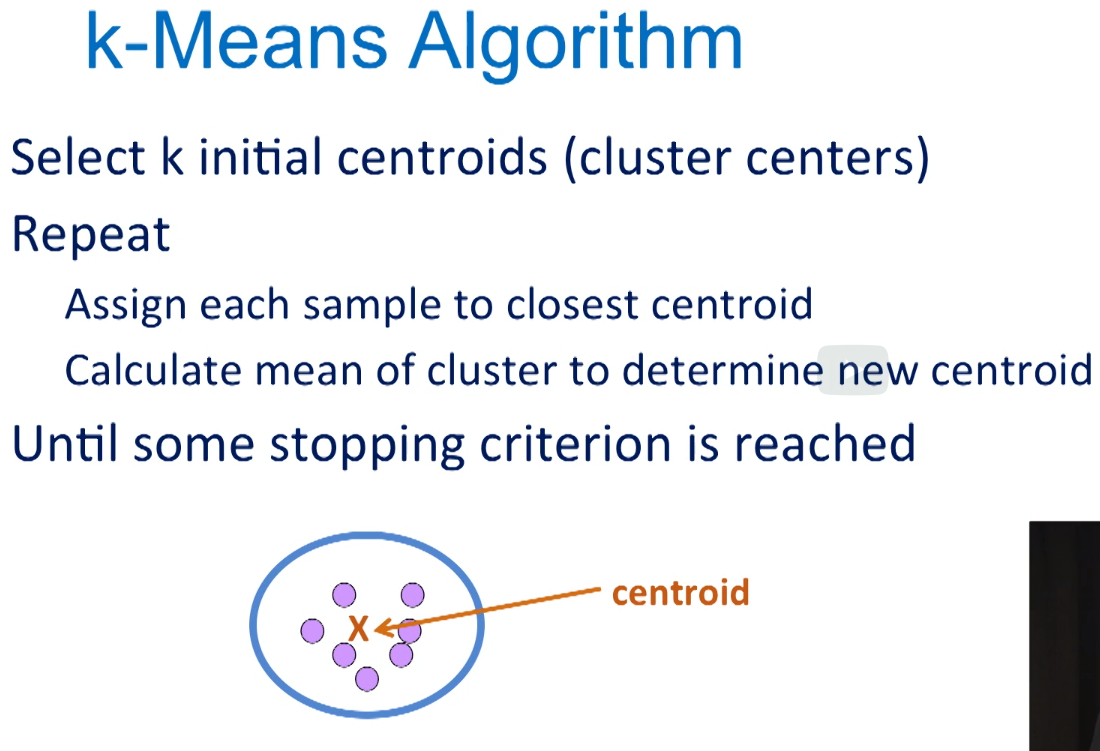
<p style="font-family: Arial; font-size:2.75em;color:purple; font-style:bold"><br>
Clustering with scikit-learn
<br><br></p>

In this notebook, we will learn how to perform k-means lustering using scikit-learn in Python. 

We will use cluster analysis to generate a big picture model of the weather at a local station using a minute-graunlarity data. In this dataset, we have in the order of millions records. How do we create 12 clusters our of them?

**NOTE:** The dataset we will use is in a large CSV file called *minute_weather.csv*. Please download it into the *weather* directory in your *Week-7-MachineLearning* folder. The download link is: https://drive.google.com/open?id=0B8iiZ7pSaSFZb3ItQ1l4LWRMTjg 

<p style="font-family: Arial; font-size:1.75em;color:purple; font-style:bold"><br>

Importing the Necessary Libraries<br></p>

In [80]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
from itertools import cycle, islice
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates

%matplotlib inline

<p style="font-family: Arial; font-size:1.75em;color:purple; font-style:bold"><br>

Creating a Pandas DataFrame from a CSV file<br><br></p>


In [81]:
data = pd.read_csv('./minute_weather.csv')


<p style="font-family: Arial; font-size:1.75em;color:purple; font-style:bold">Minute Weather Data Description</p>
<br>
The **minute weather dataset** comes from the same source as the daily weather dataset that we used in the decision tree based classifier notebook. The main difference between these two datasets is that the minute weather dataset contains raw sensor measurements captured at one-minute intervals. Daily weather dataset instead contained processed and well curated data. The data is in the file **minute_weather.csv**, which is a comma-separated file.

As with the daily weather data, this data comes from a weather station located in San Diego, California. The weather station is equipped with sensors that capture weather-related measurements such as air temperature, air pressure, and relative humidity. Data was collected for a period of three years, from September 2011 to September 2014, to ensure that sufficient data for different seasons and weather conditions is captured.

Each row in **minute_weather.csv** contains weather data captured for a one-minute interval. Each row, or sample, consists of the following variables:

* **rowID:** 	unique number for each row	(*Unit: NA*)
* **hpwren_timestamp:**	timestamp of measure	(*Unit: year-month-day hour:minute:second*)
* **air_pressure:** air pressure measured at the timestamp	(*Unit: hectopascals*)
* **air_temp:**	air temperature measure at the timestamp	(*Unit: degrees Fahrenheit*)
* **avg_wind_direction:**	wind direction averaged over the minute before the timestamp	(*Unit: degrees, with 0 means coming from the North, and increasing clockwise*)
* **avg_wind_speed:**	wind speed averaged over the minute before the timestamp	(*Unit: meters per second*)
* **max_wind_direction:**	highest wind direction in the minute before the timestamp	(*Unit: degrees, with 0 being North and increasing clockwise*)
* **max_wind_speed:**	highest wind speed in the minute before the timestamp	(*Unit: meters per second*)
* **min_wind_direction:**	smallest wind direction in the minute before the timestamp	(*Unit: degrees, with 0 being North and inceasing clockwise*)
* **min_wind_speed:**	smallest wind speed in the minute before the timestamp	(*Unit: meters per second*)
* **rain_accumulation:**	amount of accumulated rain measured at the timestamp	(*Unit: millimeters*)
* **rain_duration:**	length of time rain has fallen as measured at the timestamp	(*Unit: seconds*)
* **relative_humidity:**	relative humidity measured at the timestamp	(*Unit: percent*)

In [82]:
data.shape

(1587257, 13)

In [85]:
data.head(50)

,rowID,hpwren_timestamp,air_pressure,air_temp,avg_wind_direction,avg_wind_speed,max_wind_direction,max_wind_speed,min_wind_direction,min_wind_speed,rain_accumulation,rain_duration,relative_humidity
0,0,2011-09-10 00:00:49,912.3,64.76,97.0,1.2,106.0,1.6,85.0,1.0,NaN,NaN,60.5
1,1,2011-09-10 00:01:49,912.3,63.86,161.0,0.8,215.0,1.5,43.0,0.2,0.0,0.0,39.9
2,2,2011-09-10 00:02:49,912.3,64.22,77.0,0.7,143.0,1.2,324.0,0.3,0.0,0.0,43.0
3,3,2011-09-10 00:03:49,912.3,64.40,89.0,1.2,112.0,1.6,12.0,0.7,0.0,0.0,49.5
4,4,2011-09-10 00:04:49,912.3,64.40,185.0,0.4,260.0,1.0,100.0,0.1,0.0,0.0,58.8
5,5,2011-09-10 00:05:49,912.3,63.50,76.0,2.5,92.0,3.0,61.0,2.0,0.0,0.0,62.6
6,6,2011-09-10 00:06:49,912.3,62.78,79.0,2.4,89.0,2.7,62.0,2.0,0.0,0.0,65.6
7,7,2011-09-10 00:07:49,912.3,62.42,86.0,2.0,92.0,2.4,75.0,1.8,0.0,0.0,65.2
8,8,2011-09-10 00:08:49,912.3,62.24,105.0,1.4,125.0,1.9,82.0,1.0,0.0,0.0,65.8
9,9,2011-09-10 00:09:49,912.3,62.24,93.0,0.4,126.0,0.7,14.0,0.2,0.0,0.0,58.6


<p style="font-family: Arial; font-size:1.75em;color:purple; font-style:bold"><br>

Data Sampling<br></p>

Lots of rows, so let us sample down by taking every 10th row. <br>


In [99]:
sampled_df = data[(data['rowID'] % 10) == 0] # every 10th row because  instead of one minutes, we'll do 10 minutes.. go to every row and divide by 10 and if remainder is 1 then save it to sammmmpled_df
sampled_df.shape

(158726, 13)

<p style="font-family: Arial; font-size:1.75em;color:purple; font-style:bold"><br>

Statistics
<br><br></p>


In [36]:
sampled_df.describe().transpose() # if I didn't say transpose actually, the original columns would be displayed as columns.

,count,mean,std,min,25%,50%,75%,max
rowID,158726.0,793625.000000,458203.937510,0.00,396812.5,793625.00,1190437.50,1587250.00
air_pressure,158726.0,916.830161,3.051717,905.00,914.8,916.70,918.70,929.50
air_temp,158726.0,61.851589,11.833569,31.64,52.7,62.24,70.88,99.50
avg_wind_direction,158680.0,162.156100,95.278201,0.00,62.0,182.00,217.00,359.00
avg_wind_speed,158680.0,2.775215,2.057624,0.00,1.3,2.20,3.80,31.90
max_wind_direction,158680.0,163.462144,92.452139,0.00,68.0,187.00,223.00,359.00
max_wind_speed,158680.0,3.400558,2.418802,0.10,1.6,2.70,4.60,36.00
min_wind_direction,158680.0,166.774017,97.441109,0.00,76.0,180.00,212.00,359.00
min_wind_speed,158680.0,2.134664,1.742113,0.00,0.8,1.60,3.00,31.60
rain_accumulation,158725.0,0.000318,0.011236,0.00,0.0,0.00,0.00,3.12


In [104]:
sampled_df[sampled_df['rain_accumulation'] == 0].shape # Let's see how many rows have the value zero for columns,for rain accumulation

(157812, 13)

In [66]:
sampled_df['rain_accumulation'][40] # accessing value of rain_accumulation and row 40


0.0

In [70]:
sampled_df.iloc[4,3]

64.04

In [53]:
sampled_df['rain_accumulation'] == 0

0          False
10          True
20          True
30          True
40          True
           ...  
1587210     True
1587220     True
1587230     True
1587240     True
1587250     True
Name: rain_accumulation, Length: 158726, dtype: bool

In [98]:
sampled_df[sampled_df == False].count().sum()

317721

In [105]:
sampled_df[sampled_df['rain_duration'] == 0].shape # rain duration is how long it rained for.


(157237, 13)

<p style="font-family: Arial; font-size:1.75em;color:purple; font-style:bold"><br>

Drop all the Rows with Empty rain_duration and rain_accumulation
<br><br></p>


In [61]:
sampled_df[sampled_df['rain_duration'] == 0].shape

(157237, 13)

In [106]:
del sampled_df['rain_accumulation']
del sampled_df['rain_duration']

In [107]:
sampled_df.columns

Index(['rowID', 'hpwren_timestamp', 'air_pressure', 'air_temp',
       'avg_wind_direction', 'avg_wind_speed', 'max_wind_direction',
       'max_wind_speed', 'min_wind_direction', 'min_wind_speed',
       'relative_humidity'],
      dtype='object')

In [108]:
rows_before = sampled_df.shape[0]
sampled_df = sampled_df.dropna()
rows_after = sampled_df.shape[0]

<p style="font-family: Arial; font-size:1.75em;color:purple; font-style:bold"><br>

How many rows did we drop ?
<br><br></p>


In [109]:
rows_before - rows_after

46

In [110]:
sampled_df.columns

Index(['rowID', 'hpwren_timestamp', 'air_pressure', 'air_temp',
       'avg_wind_direction', 'avg_wind_speed', 'max_wind_direction',
       'max_wind_speed', 'min_wind_direction', 'min_wind_speed',
       'relative_humidity'],
      dtype='object')

<p style="font-family: Arial; font-size:1.75em;color:purple; font-style:bold"><br>

Select Features of Interest for Clustering
<br><br></p>


In [113]:
features = ['air_pressure', 'air_temp', 'avg_wind_direction', 'avg_wind_speed', 'max_wind_direction', 
        'max_wind_speed','relative_humidity']

In [115]:
select_df = sampled_df[features]

In [116]:
select_df.columns

Index(['air_pressure', 'air_temp', 'avg_wind_direction', 'avg_wind_speed',
       'max_wind_direction', 'max_wind_speed', 'relative_humidity'],
      dtype='object')

In [117]:
select_df

,air_pressure,air_temp,avg_wind_direction,avg_wind_speed,max_wind_direction,max_wind_speed,relative_humidity
0,912.3,64.76,97.0,1.2,106.0,1.6,60.5
10,912.3,62.24,144.0,1.2,167.0,1.8,38.5
20,912.2,63.32,100.0,2.0,122.0,2.5,58.3
30,912.2,62.60,91.0,2.0,103.0,2.4,57.9
40,912.2,64.04,81.0,2.6,88.0,2.9,57.4
...,...,...,...,...,...,...,...
1587210,915.9,75.56,330.0,1.0,341.0,1.3,47.8
1587220,915.9,75.56,330.0,1.1,341.0,1.4,48.0
1587230,915.9,75.56,344.0,1.4,352.0,1.7,48.0
1587240,915.9,75.20,359.0,1.3,9.0,1.6,46.3


In [123]:
A = ['air_pressure', 'air_temp']

In [124]:
select_df1 = sampled_df[A]

In [127]:
test = StandardScaler().fit_transform(select_df1)
test


array([[-1.48456281,  0.24544455],
       [-1.48456281,  0.03247142],
       [-1.51733167,  0.12374562],
       ...,
       [-0.30488381,  1.15818654],
       [-0.30488381,  1.12776181],
       [-0.30488381,  1.09733708]])

<p style="font-family: Arial; font-size:1.75em;color:purple; font-style:bold"><br>

Scale the Features using StandardScaler
<br><br></p>


In [122]:
X = StandardScaler().fit_transform(select_df)
X

array([[-1.48456281,  0.24544455, -0.68385323, ..., -0.62153592,
        -0.74440309,  0.49233835],
       [-1.48456281,  0.03247142, -0.19055941, ...,  0.03826701,
        -0.66171726, -0.34710804],
       [-1.51733167,  0.12374562, -0.65236639, ..., -0.44847286,
        -0.37231683,  0.40839371],
       ...,
       [-0.30488381,  1.15818654,  1.90856325, ...,  2.0393087 ,
        -0.70306017,  0.01538018],
       [-0.30488381,  1.12776181,  2.06599745, ..., -1.67073075,
        -0.74440309, -0.04948614],
       [-0.30488381,  1.09733708, -1.63895404, ..., -1.55174989,
        -0.62037434, -0.05711747]])

<p style="font-family: Arial; font-size:1.75em;color:purple; font-style:bold"><br>

Use k-Means Clustering
<br><br></p>


In [128]:
X = StandardScaler().fit_transform(select_df)
X

array([[-1.48456281,  0.24544455, -0.68385323, ..., -0.62153592,
        -0.74440309,  0.49233835],
       [-1.48456281,  0.03247142, -0.19055941, ...,  0.03826701,
        -0.66171726, -0.34710804],
       [-1.51733167,  0.12374562, -0.65236639, ..., -0.44847286,
        -0.37231683,  0.40839371],
       ...,
       [-0.30488381,  1.15818654,  1.90856325, ...,  2.0393087 ,
        -0.70306017,  0.01538018],
       [-0.30488381,  1.12776181,  2.06599745, ..., -1.67073075,
        -0.74440309, -0.04948614],
       [-0.30488381,  1.09733708, -1.63895404, ..., -1.55174989,
        -0.62037434, -0.05711747]])

In [129]:
kmeans = KMeans(n_clusters=12)
model = kmeans.fit(X)
print("model\n", model)

/home/akanchha/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


model
 KMeans(n_clusters=12)


<p style="font-family: Arial; font-size:1.75em;color:purple; font-style:bold"><br>

What are the centers of 12 clusters we formed ?
<br><br></p>


In [130]:
centers = model.cluster_centers_
centers

array([[ 0.1299352 ,  0.84604682,  1.40989688, -0.63810439,  1.67382094,
        -0.58874978, -0.71351333],
       [-0.15738969,  0.86101754, -1.31111531, -0.58998773, -1.16672618,
        -0.60534173, -0.64428987],
       [ 0.24819108, -0.99703207,  0.65987543, -0.54606771,  0.84901863,
        -0.52874369,  1.16207477],
       [-0.69453515,  0.54260621,  0.17574993, -0.58689866,  0.3454762 ,
        -0.60040418, -0.11360102],
       [ 1.37275791, -0.08547006, -1.206426  , -0.03861686, -1.07550669,
        -0.01734864, -0.97878852],
       [-0.21175996,  0.63464212,  0.40838792,  0.73174552,  0.51664654,
         0.67018604, -0.15124398],
       [-1.17968589, -0.87251356,  0.44690306,  1.97904016,  0.53860333,
         1.93972214,  0.9104507 ],
       [ 0.23403807,  0.3215616 ,  1.88792441, -0.65174146, -1.55193311,
        -0.5766804 , -0.28447273],
       [ 1.18820694, -0.25540968, -1.15495074,  2.13282018, -1.05350848,
         2.24986294, -1.13447779],
       [ 0.06077071, -0.7874

<p style="font-family: Arial; font-size:2.75em;color:purple; font-style:bold"><br>

Plots
<br><br></p>


Let us first create some utility functions which will help us in plotting graphs:

In [ ]:
# Function that creates a DataFrame with a column for Cluster Number

def pd_centers(featuresUsed, centers):
	colNames = list(featuresUsed)
	colNames.append('prediction')

	# Zip with a column called 'prediction' (index)
	Z = [np.append(A, index) for index, A in enumerate(centers)]

	# Convert to pandas data frame for plotting
	P = pd.DataFrame(Z, columns=colNames)
	P['prediction'] = P['prediction'].astype(int)
	return P

In [ ]:
# Function that creates Parallel Plots

def parallel_plot(data):
	my_colors = list(islice(cycle(['b', 'r', 'g', 'y', 'k']), None, len(data)))
	plt.figure(figsize=(15,8)).gca().axes.set_ylim([-3,+3])
	parallel_coordinates(data, 'prediction', color = my_colors, marker='o')

In [ ]:
P = pd_centers(features, centers)
P

# Dry Days

In [ ]:
parallel_plot(P[P['relative_humidity'] < -0.5])

# Warm Days

In [ ]:
parallel_plot(P[P['air_temp'] > 0.5])

# Cool Days

In [ ]:
parallel_plot(P[(P['relative_humidity'] > 0.5) & (P['air_temp'] < 0.5)])